Loading the Wisconsin Breast Cancer dataset from Scikit-learn...
Dataset successfully loaded!

First 5 rows of the data:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Distribution of Target (0=Malignant, 1=Benign):
target
1    357
0    212
Name: count, dtype: int64

Visualizing key features...


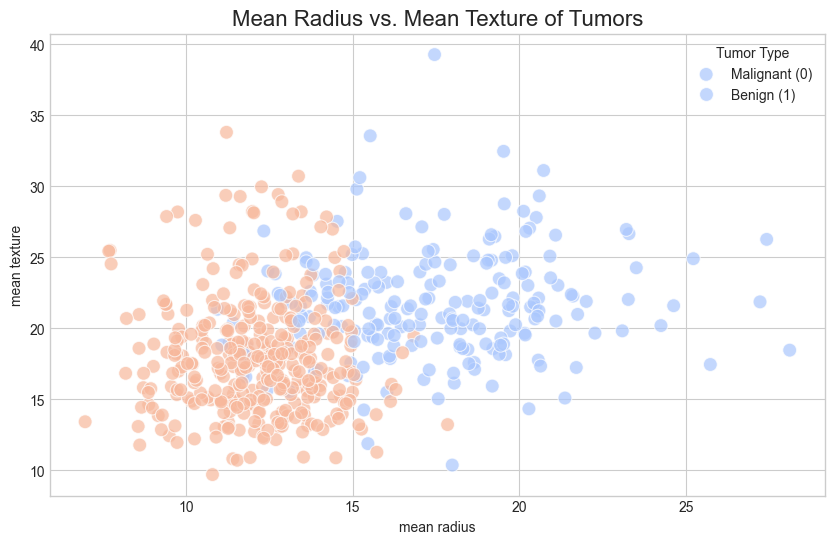

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

print("Loading the Wisconsin Breast Cancer dataset from Scikit-learn...")

cancer_dataset = load_breast_cancer()

df = pd.DataFrame(data=cancer_dataset.data, columns=cancer_dataset.feature_names)
df['target'] = cancer_dataset.target

print("Dataset successfully loaded!")

print("\nFirst 5 rows of the data:")
display(df.head())

print("\nDistribution of Target (0=Malignant, 1=Benign):")
print(df['target'].value_counts())

print("\nVisualizing key features...")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df,
                x='mean radius',
                y='mean texture',
                hue='target',
                palette='coolwarm',
                s=100,
                alpha=0.7)

plt.title('Mean Radius vs. Mean Texture of Tumors', fontsize=16)
plt.legend(title='Tumor Type', labels=['Malignant (0)', 'Benign (1)'])
plt.show()

Preparing data and training the model...

--- Model Performance ---
Classification Report:
               precision    recall  f1-score   support

Malignant (0)       0.97      0.90      0.94        42
   Benign (1)       0.95      0.99      0.97        72

     accuracy                           0.96       114
    macro avg       0.96      0.95      0.95       114
 weighted avg       0.96      0.96      0.96       114



c:\Users\xavie\Documents\MyFirstMLProject\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:06:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


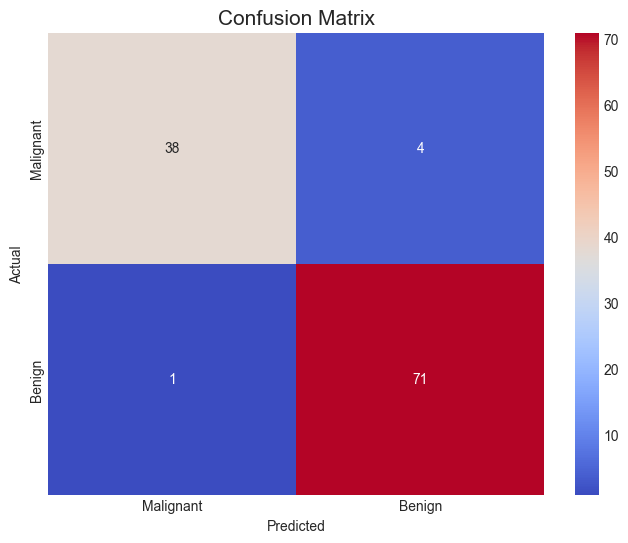


--- Most Important Predictive Features ---


C:\Users\xavie\AppData\Local\Temp\ipykernel_10076\1038763738.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='coolwarm')


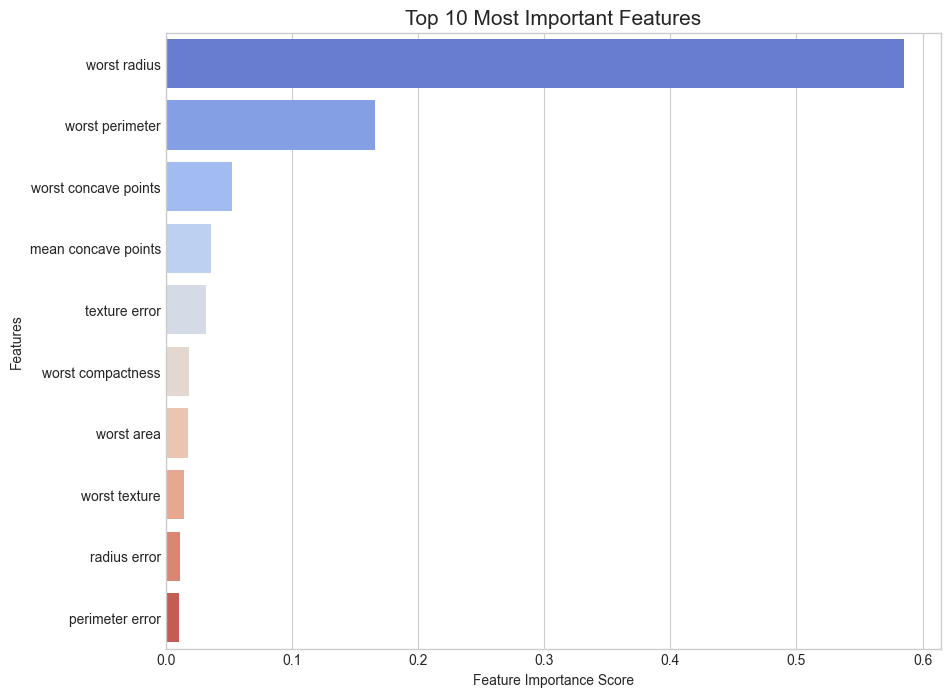

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

print("Preparing data and training the model...")

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("\n--- Model Performance ---")
print("Classification Report:")
print(classification_report(y_test, predictions, target_names=['Malignant (0)', 'Benign (1)']))

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix', fontsize=15)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n--- Most Important Predictive Features ---")
feature_importances = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='coolwarm')
plt.title('Top 10 Most Important Features', fontsize=15)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


--- Generating Advanced Model Explanations with SHAP ---

SHAP Summary Plot:


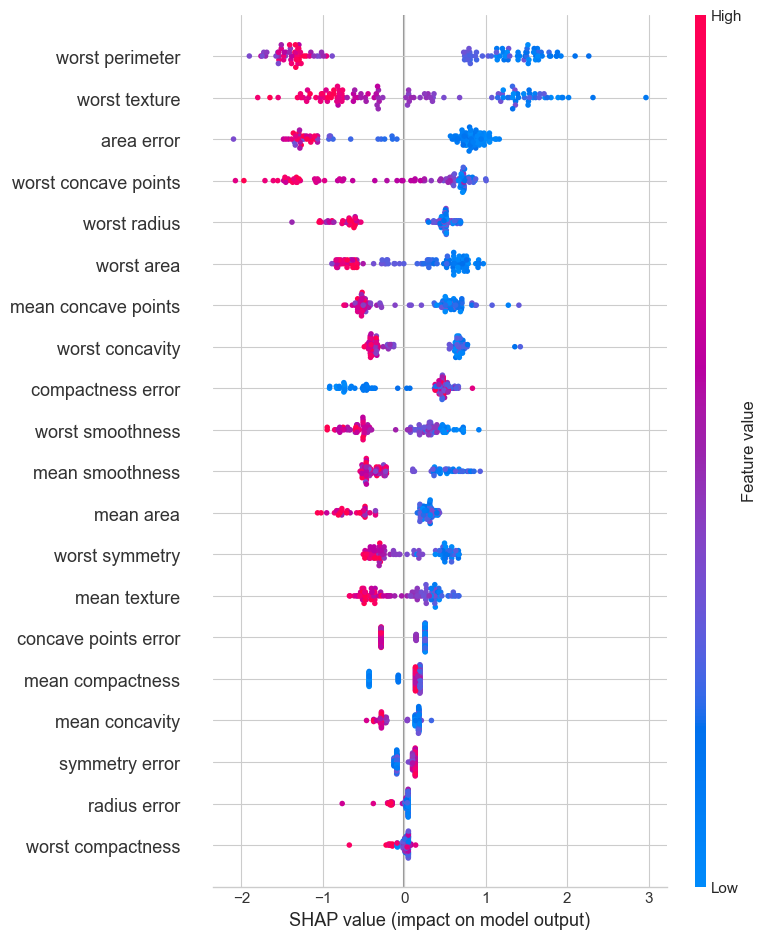



Explaining a single prediction (the first patient in the test set):


In [3]:
%pip install shap

import shap

# This assumes your trained XGBoost model is named 'model' 
# and your test data is 'X_test' (the scaled version)
# and your original feature DataFrame is 'X'

print("--- Generating Advanced Model Explanations with SHAP ---")

# 1. Create a SHAP explainer object
explainer = shap.TreeExplainer(model)

# 2. Calculate SHAP values for your test data
# This explains the prediction for each sample in the test set
shap_values = explainer.shap_values(X_test)

# 3. Create the SHAP Summary Plot
# This is a more powerful version of a feature importance plot.
# It shows not just WHICH features are important, but also HOW they impact the prediction.
print("\nSHAP Summary Plot:")
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


# 4. Explain a Single Prediction
# Let's explain why the model made its prediction for the first patient in the test set.
print("\n\nExplaining a single prediction (the first patient in the test set):")
shap.initjs() # required for force_plot to display in notebooks

# Create a force plot for a single instance
# This plot shows which features pushed the prediction towards 'Malignant' (red) or 'Benign' (blue)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test[0,:], feature_names=X.columns)